In [1]:
import tensorflow as tf
import os
import datetime

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

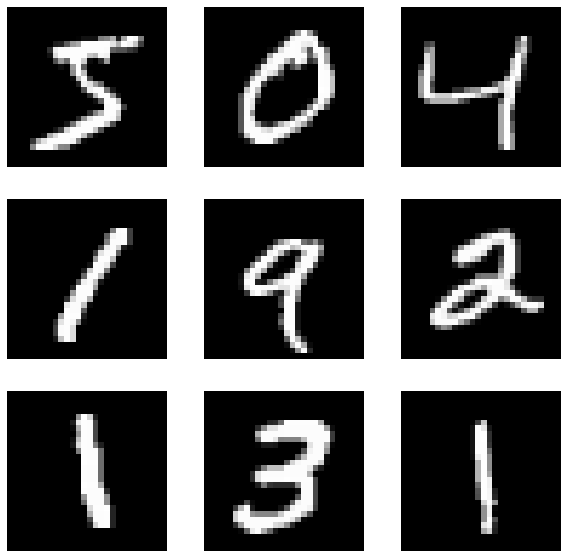

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(
             from_logits=True),
             metrics=['accuracy'])

In [9]:
logdir = "./logs"
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_cb])

Epoch 1/5
1875/1875 [==============================] - 1s 712us/step - loss: 0.0661 - accuracy: 0.9791
Epoch 2/5
1875/1875 [==============================] - 1s 713us/step - loss: 0.0587 - accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.0542 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 1s 725us/step - loss: 0.0485 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 1s 713us/step - loss: 0.0437 - accuracy: 0.9854


In [11]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0719 - accuracy: 0.9803 - 147ms/epoch - 470us/step


[0.07187772542238235, 0.9803000092506409]